<a href="https://colab.research.google.com/github/SantoshKumarP1412/Network_Fundamentals/blob/main/android_malware_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We changed some of parameters like "no of features selection" and in algorithm in parameters line "estimator or no of states".

In [2]:
import numpy as np
import pandas as pd
import time
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report,accuracy_score





In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Looking at the data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/feature_vectors_syscallsbinders_frequency_5_Cat.csv')

# Labels
  # Adware: 1,253-------1
# Banking: 2,100------2
# SMS malware: 3,904--3
# Riskware: 2,546-----4
# Benign: 1,795-------5

In [5]:
df.head()

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,0,1,111,20,1
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,0,7,987,197,1
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,0,1,98,25,1


In [6]:
df

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,0,1,111,20,1
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,0,7,987,197,1
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,0,1,98,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11593,2,0,0,11,0,61,13,0,66,17,...,0,0,0,0,0,0,10,2764,236,5
11594,6,0,0,10,1,69,50,1,118,15,...,0,0,0,0,1,0,5,4417,295,5
11595,0,0,0,0,0,21,16,0,48,9,...,0,0,0,0,0,0,5,241,67,5
11596,1,0,0,15,0,90,80,0,239,50,...,0,0,0,0,0,0,3,1703,774,5


In [7]:
df.shape

(11598, 471)

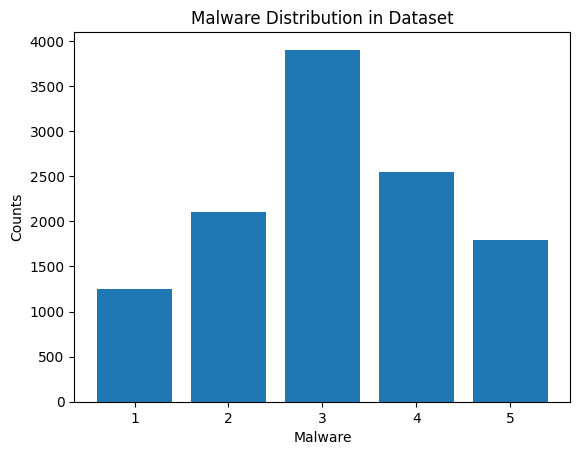

In [8]:
label_counts = df['Class'].value_counts()

labels = label_counts.index.tolist()
counts = label_counts.tolist()

plt.bar(labels, counts)
plt.xlabel('Malware')
plt.ylabel('Counts')
plt.title('Malware Distribution in Dataset')
plt.show()

In [9]:
# features
df.columns


Index(['ACCESS_PERSONAL_INFO___', 'ALTER_PHONE_STATE___', 'ANTI_DEBUG_____',
       'CREATE_FOLDER_____', 'CREATE_PROCESS`_____', 'CREATE_THREAD_____',
       'DEVICE_ACCESS_____', 'EXECUTE_____', 'FS_ACCESS____',
       'FS_ACCESS()____',
       ...
       'utimes', 'vfork', 'vibrate', 'vibratePattern', 'wait4',
       'watchRotation', 'windowGainedFocus', 'write', 'writev', 'Class'],
      dtype='object', length=471)

In [10]:
df["Class"].unique()

array([1, 2, 3, 4, 5])

# Data Preprocessing

In [11]:
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=42)

#ANOVA-based feature selection
num_features_to_select = 160
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of selected features
selected_feature_indices = selector.get_support(indices=True)

# Convert selected features to a DataFrame
X_train = X_train.iloc[:, selected_feature_indices]
X_test = X_test.iloc[:, selected_feature_indices]
X_train.head()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [157 169 171 191 275 315 320 352 436 456] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,FS_ACCESS(CREATE)____,FS_ACCESS(CREATE__APPEND)__,FS_ACCESS(CREATE__READ)__,FS_ACCESS(CREATE__READ__WRITE),...,socketpair,startInput,startWatchingRoutes,stat64,statfs64,sysinfo,ugetrlimit,uname,unlink,vfork
6227,2,0,10,0,16,0,2,0,0,0,...,0,1,0,31,0,0,0,1,0,0
3009,0,0,8,0,4,0,1,0,0,0,...,0,0,0,11,0,0,0,1,0,0
994,0,0,18,0,16,0,1,0,0,0,...,0,0,0,38,0,0,0,1,0,0
2778,3,1,14,1,26,1,3,0,0,0,...,0,0,0,41,1,0,1,1,1,0
8345,0,0,8,0,45,0,5,0,1,0,...,0,0,0,98,1,0,0,1,2,0


In [12]:
X_test.shape

(2320, 160)

In [13]:
#Standardize Data Removing Irrelevant Values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Done with preprocessing. Now we will run our data through different ML models and store the evaluation metrics.

# Random Forest

Random Forest Classifier Accuracy: 0.9457
Random Forest Classifier Precision: 0.9465
Random Forest Classifier Recall: 0.9457
Random Forest Classifier F1-Score: 0.9456


<Axes: >

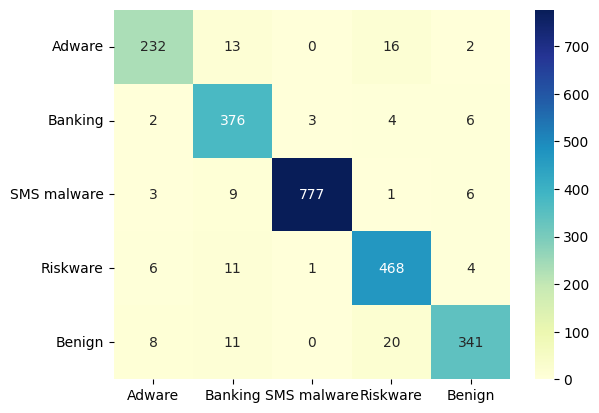

In [14]:
#here best 700 estimation can give better accuracy

# Random Forest Classifier Accuracy: 0.9435
# Random Forest Classifier Precision: 0.9445
# Random Forest Classifier Recall: 0.9435
# Random Forest Classifier F1-Score: 0.9435

rf_model = RandomForestClassifier(random_state=42)


rfModel = RandomForestClassifier(n_estimators=300, random_state=42)
rfModel.fit(X_train, y_train)

# Predict labels on the test set
y_pred = rfModel.predict(X_test)

# Calculate Random Forest classifier metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred,average='weighted')
rf_recall = recall_score(y_test, y_pred,average='weighted')
rf_f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Classifier Precision: {rf_precision:.4f}")
print(f"Random Forest Classifier Recall: {rf_recall:.4f}")
print(f"Random Forest Classifier F1-Score: {rf_f1:.4f}")

conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], yticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], annot=True)

# SVM

SVM Classifier Accuracy: 0.8461
SVM Classifier Precision: 0.8467
SVM Classifier Recall: 0.8461
SVM Classifier F1-Score: 0.8445


<Axes: >

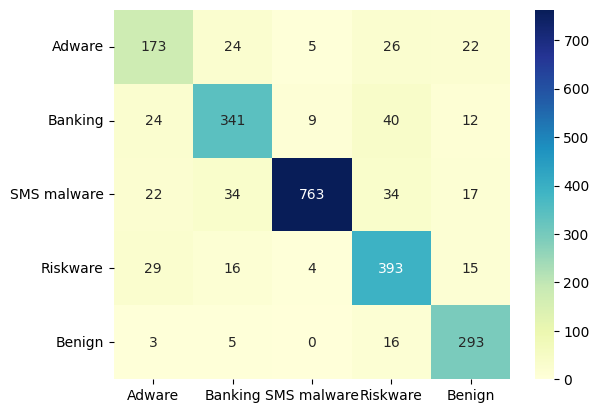

In [ ]:
#SVM Classifier Accuracy: 0.8496
#SVM Classifier Precision: 0.8486
#SVM Classifier Recall: 0.8496
#SVM Classifier F1-Score: 0.8473


SVmodel = SVC(kernel='linear', C=1.0, random_state=16) #C=1.0, random_state=16
SVmodel.fit(X_train, y_train)

# Predict labels on the test set
y_pred = SVmodel.predict(X_test)


# Calculate SVM classifier metrics
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred,average='weighted')
svm_recall = recall_score(y_test, y_pred,average='weighted')
svm_f1 = f1_score(y_test, y_pred,average='weighted')

print(f"SVM Classifier Accuracy: {svm_accuracy:.4f}")
print(f"SVM Classifier Precision: {svm_precision:.4f}")
print(f"SVM Classifier Recall: {svm_recall:.4f}")
print(f"SVM Classifier F1-Score: {svm_f1:.4f}")

conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], yticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], annot=True)

In [ ]:
#Combine result visulaization



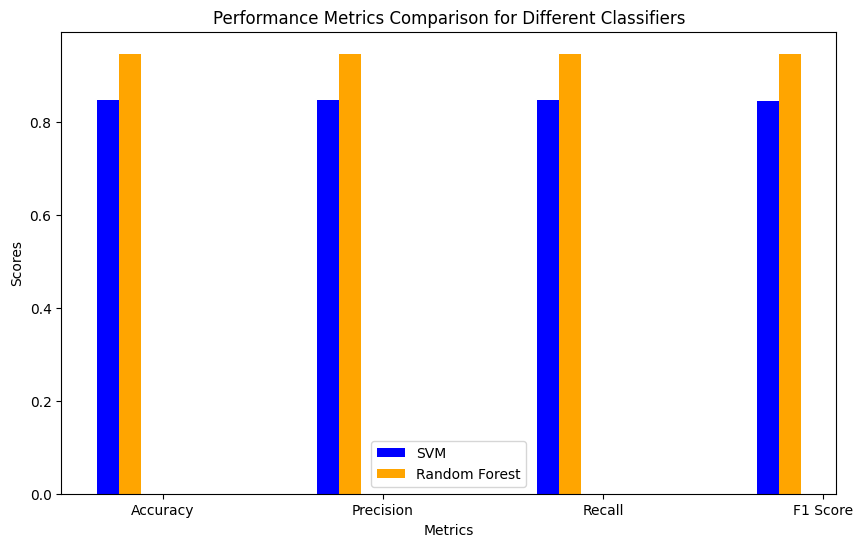

In [ ]:
#classifiers and their colors
classifiers = ['SVM', 'Random Forest']
colors = ['blue', 'orange']

accuracy_scores = [ svm_accuracy, rf_accuracy]
precision_scores = [ svm_precision, rf_precision]
recall_scores = [ svm_recall, rf_recall]
f1_scores = [ svm_f1, rf_f1]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Define the data for each metric
data = [accuracy_scores, precision_scores, recall_scores, f1_scores]

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(metrics))

# Set the width of each bar
width = 0.10

#each classifier and plot bars
for i, classifier in enumerate(classifiers):
    ax.bar(x + i*width, [d[i] for d in data], width, label=classifier, color=colors[i])

#labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison for Different Classifiers')
ax.set_xticks(x + 2.5*width)



ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.show()

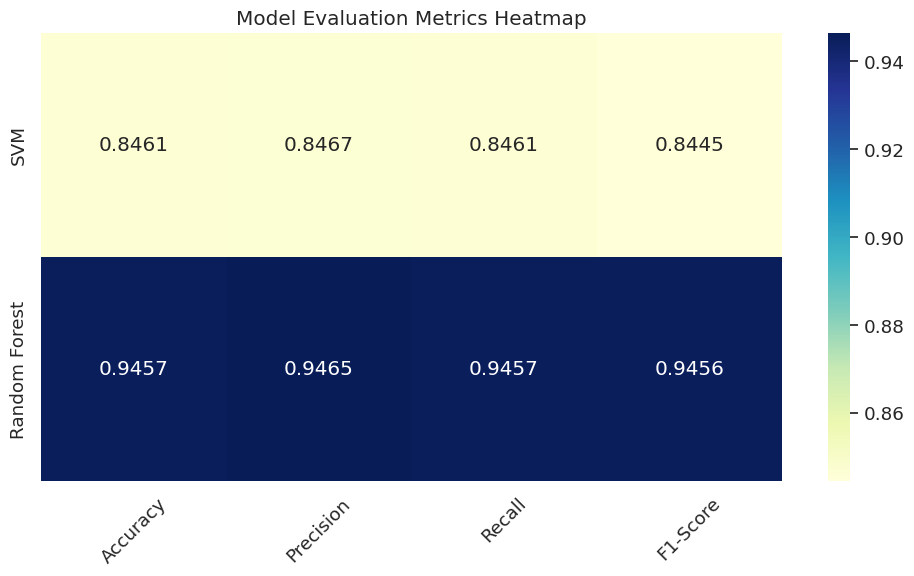

In [ ]:
#classifiers and metrics
classifiers = ['SVM', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# metric scores
accuracy_scores = [svm_accuracy, rf_accuracy]
precision_scores = [ svm_precision, rf_precision]
recall_scores = [ svm_recall, rf_recall]
f1_scores = [svm_f1, rf_f1]

#dictionary to store metric
metric_scores = {
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
}

#DataFrame from the dictionary
df = pd.DataFrame(metric_scores, index=classifiers)

#heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt='.4f')
plt.title("Model Evaluation Metrics Heatmap")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
df

,Accuracy,Precision,Recall,F1-Score
SVM,0.846121,0.846713,0.846121,0.844464
Random Forest,0.945690,0.946535,0.945690,0.945625


#LSTM

In [15]:


# Encode string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Print data types of selected columns
print(X.dtypes)

# Convert all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Scale numerical features
scaler = StandardScaler()
# Print the shape of X before scaling
print("Shape of X before scaling:", X.shape)

X_scaled = scaler.fit_transform(X)

# Print the shape of X after scaling
print("Shape of X after scaling:", X_scaled.shape)

# Convert X_scaled to a 3D array suitable for LSTM
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_encoded, train_size=0.70, random_state=2)

# One-hot encode the target variable
num_classes = len(np.unique(y_encoded))
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# Adjust the model output layer
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))  # Adjust to the number of classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Start measuring execution time
start_time = time.time()

# Train the model
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_test_one_hot))
# Stop measuring execution time
end_time = time.time()

# Obtain predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

# Calculate and print the execution time
execution_time = end_time - start_time
print(f'Training and evaluation took {execution_time:.2f} seconds')

print(f"LSTM Classifier Accuracy: {accuracy:.4f}")
print(f"LSTM Classifier Precision: {precision:.4f}")
print(f"LSTM Classifier Recall: {recall:.4f}")
print(f"LSTM Classifier F1-Score: {f1:.4f}")



ACCESS_PERSONAL_INFO___    int64
ALTER_PHONE_STATE___       int64
ANTI_DEBUG_____            int64
CREATE_FOLDER_____         int64
CREATE_PROCESS`_____       int64
                           ...  
wait4                      int64
watchRotation              int64
windowGainedFocus          int64
write                      int64
writev                     int64
Length: 470, dtype: object
Shape of X before scaling: (11598, 470)
Shape of X after scaling: (11598, 470)
Epoch 1/10
254/254 [==============================] - 6s 10ms/step - loss: 0.9400 - accuracy: 0.6700 - val_loss: 0.6796 - val_accuracy: 0.7716
Epoch 2/10
254/254 [==============================] - 2s 6ms/step - loss: 0.5843 - accuracy: 0.8147 - val_loss: 0.5526 - val_accuracy: 0.8161
Epoch 3/10
254/254 [==============================] - 2s 6ms/step - loss: 0.4818 - accuracy: 0.8511 - val_loss: 0.4884 - val_accuracy: 0.8437
Epoch 4/10
254/254 [==============================] - 2s 6ms/step - loss: 0.4243 - accuracy: 0.8700 - va

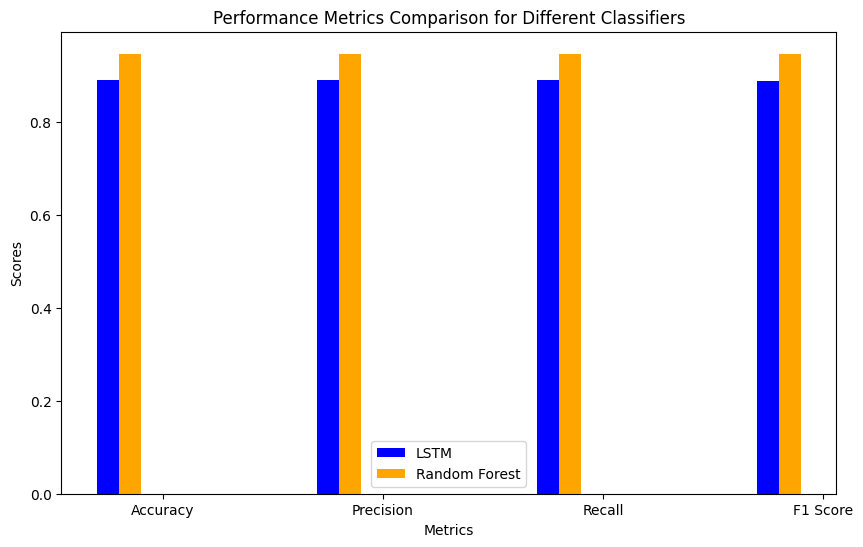

In [16]:
#classifiers and their colors
classifiers = ['LSTM', 'Random Forest']
colors = ['blue', 'orange']

accuracy_scores = [ accuracy, rf_accuracy]
precision_scores = [ precision, rf_precision]
recall_scores = [ recall, rf_recall]
f1_scores = [ f1, rf_f1]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Define the data for each metric
data = [accuracy_scores, precision_scores, recall_scores, f1_scores]

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(metrics))

# Set the width of each bar
width = 0.10

#each classifier and plot bars
for i, classifier in enumerate(classifiers):
    ax.bar(x + i*width, [d[i] for d in data], width, label=classifier, color=colors[i])

#labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison for Different Classifiers')
ax.set_xticks(x + 2.5*width)



ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.show()